In [1]:
################################################
### using filtered data
!pip install tensorflow scikit-learn 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 8.4 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 10.7 MB/s eta 0:00:0000:0100:01


In [2]:
import pickle
with open('shaped.pickle', 'rb') as f:
    ab = pickle.load(f)

# Новий розділ

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
ab.shape

(297, 1200)

In [5]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import numpy #,  string #pandas, xgboost, textblob,
#from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import layers, models, optimizers

2025-03-24 10:23:23.341955: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-24 10:23:23.438978: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-24 10:23:23.516026: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742811803.593993      22 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742811803.614259      22 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742811803.756234      22 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [6]:
import tensorflow as tf
tf. __version__

'2.19.0'

In [7]:
# Define models:

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, valid_y)

def train_model2(classifier, feature_vector_train, label, feature_vector_valid, valid_Y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, valid_Y)

In [8]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import numpy as np
from scipy.sparse import csr_matrix

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import time
import warnings

import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import scipy

In [9]:
y_ = np.ones(len(ab))

In [10]:
start_time = time.time()
#a = np.reshape(np.array(tempvar),(297*20,60))

#base parameters
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10, #maybe more
                'n_clusters': 4, #3 is actual number
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

params = default_base.copy()

pca = TruncatedSVD(n_components=10)
pca.fit(ab)
#csr_matrix(
transformed_ = pca.transform(ab)
end_time = time.time()
end_time-start_time

0.3982968330383301

In [11]:
#X_embedded2 = X_embedded

In [12]:
#X_embedded = transformed_

In [13]:
start_time = time.time()
#X_embedded = TSNE(n_components=2).fit_transform(transformed_)
X_embedded = transformed_
end_time = time.time()
end_time-start_time

3.743171691894531e-05

In [14]:
# ============
# Create cluster objects
# ============



two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

clustering_algorithms = (
        ('MBatchKMeans', two_means),
)

plot_num = 1

0.05955862998962402

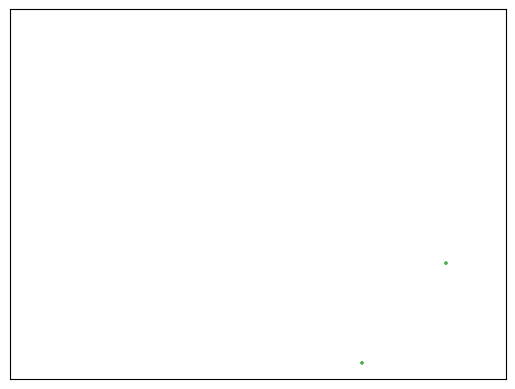

In [15]:
for name, algorithm in clustering_algorithms:

        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X_embedded)



        t1 = time.time()

        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X_embedded)

        plt.subplot(1, len(clustering_algorithms), plot_num)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])


        plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())

        plot_num += 1

        # stop, plot only one image
        break

#plt.show()
t1-t0

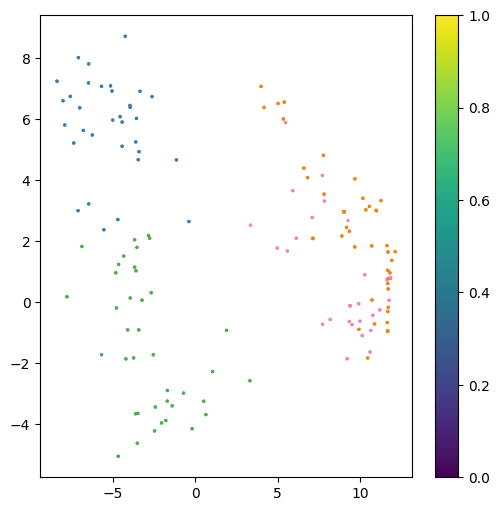

In [16]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 1))))

plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, c=colors[y_pred])
plt.colorbar()
plt.show()

In [17]:
y_pred.shape

(297,)

In [18]:
#optional classifiers to choose
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
#import seaborn as sns

In [19]:
# ab (297x1200)!

In [20]:
start_time = time.time()
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_embedded, y_pred)
end_time = time.time()
end_time-start_time

0.0012996196746826172

In [21]:
import numpy as np
#import pandas as pd
import os

import tensorflow as tf
#import tensorflow_addons as tfa #none
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output

import glob
#import imageio
import time
import IPython.display as ipd

#AUTOTUNE = tf.data.experimental.AUTOTUNE

In [22]:
# Shallow Neural Networks
# model nx100xn

import numpy as np
import scipy.sparse
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [23]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K

In [24]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

In [25]:
def create_dense_ae():
    # Розмірність кодованого простору
    hidden_dim = 60
    encoding_dim = 2

    # Кодувальник
    input = Input(shape=(10*1, )) # 10*1,  - розмірність вхідного шару
    # Додатковий шар для кодування вхідного представлення
    flat = Flatten()(input)

    hidden = Dense(hidden_dim, activation='relu')(flat)
    hidden2 = Dense(hidden_dim, activation='relu')(hidden)
    # Приховане подання кодувальника
    encoded = Dense(encoding_dim, activation='relu')(hidden2)

    # Декодувальник
    # Аналогічним чином, але послідовність шарів протилежна кодувальнику
    input_encoded = Input(shape=(encoding_dim,))
    hidden_encoded = Dense(hidden_dim, activation='sigmoid')(input_encoded)
    hidden_encoded2 = Dense(hidden_dim, activation='sigmoid')(hidden_encoded)

    flat_decoded = Dense(10*1, activation='sigmoid')(hidden_encoded2)
    decoded = Reshape((10*1, ))(flat_decoded)

    # Таким чином можна подати окремо модель як для кодувальника так і декодувальника
    # Або подавати шари окермо
    encoder = Model(input, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input, decoder(encoder(input)), name="autoencoder")
    return encoder, decoder, autoencoder

In [26]:
# перелік наявних пристроїв (у випадку TF-DML)

In [27]:
tf.config.list_physical_devices()

2025-03-24 10:23:39.716087: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [28]:
with tf.device("/device:GPU:0"): # /device:DML:0 для версії 1.15
    encoder, decoder, autoencoder = create_dense_ae()
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [29]:
# якщо все гаразд, у консолі Conda має бути подібний текст:
# tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (___ім'я вашої відеокарти___)
# tensorflow/c/logging.cc:34] Successfully opened dynamic library Kernel32.dll
# tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272]
# Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with XXXX MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)

# зазвичай обсяг пам'яті може бути вищим через віртуальну пам'ять системи, наприклад 8192 замість 4096 МB, якщо відеокарта на 4096 MB

In [30]:
# якщо немає відеокарти як такої (наприклад, якщо є процесор з ARM архітектурою без виділеного відеоядра), можливо написати і так:

In [31]:
#with tf.device("/device:CPU:0"):
#    encoder, decoder, autoencoder = create_dense_ae()
#    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [32]:
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 2)              │         4,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 10)             │         4,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,892 (34.73 KB)

 Trainable params: 8,892 (34.73 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
with tf.device("/device:GPU:0"):    # у версії TF-DML для 2.10 можна писати "/device:GPU:0" замість "/device:DML:0"
    start_time = time.time()
    autoencoder.fit(train_x, train_x,
        epochs=500,
        batch_size=50,
        shuffle=True,
        validation_data=(valid_x, valid_x))
    end_time = time.time()
    #end_time-start_time

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0015 - loss: 0.4877 - val_accuracy: 0.0133 - val_loss: 0.3666
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0665 - loss: 0.2681 - val_accuracy: 0.1867 - val_loss: 0.1381
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2430 - loss: 0.0401 - val_accuracy: 0.1867 - val_loss: -0.0798
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2144 - loss: -0.1701 - val_accuracy: 0.1867 - val_loss: -0.2914
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2355 - loss: -0.4169 - val_accuracy: 0.1867 - val_loss: -0.5001
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2369 - loss: -0.5871 - val_accuracy: 0.4667 - val_loss: -0.7083
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5462 - loss: -0.8168 - val_accuracy: 0.5467 - val_loss: -0.9175
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5617 - loss: -0.9806 - val_accuracy: 0.4933 -

In [35]:
# зауважте, що час виконання залежно від версії DirectML або типу обладнання може суттєво відрізнятися
# також час виконання на першій ітерації під відеокартою зазвичай вищий, ніж на наступних

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


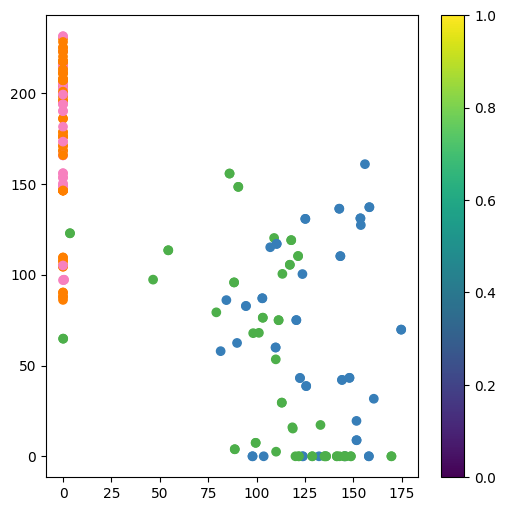

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


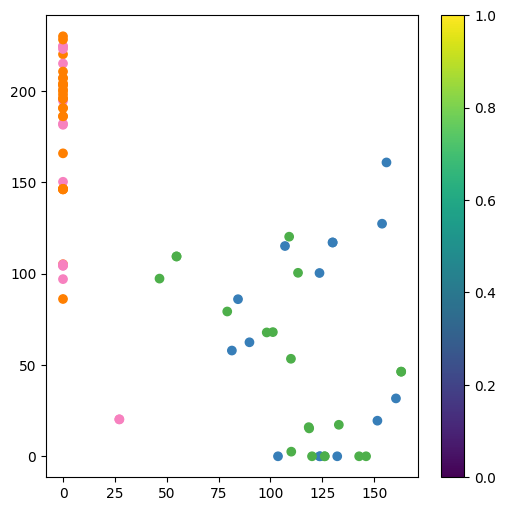

In [36]:
#Because latent space is two-dimensional, there are a few visualizations that can be done at this point.
#One is to look at the neighborhoods of different classes on the latent 2D plane:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(valid_y) + 1))))

start_time = time.time()
x_train_encoded = encoder.predict(train_x, batch_size=500)
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c = colors[train_y])
plt.colorbar()
plt.show()

x_test_encoded = encoder.predict(valid_x, batch_size=500)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c = colors[valid_y])
plt.colorbar()
plt.show()
end_time = time.time()

In [37]:
start_time = time.time()
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(ab, y_pred)
end_time = time.time()
end_time-start_time

0.0014333724975585938

In [38]:
!pip install imbalanced-learn

In [39]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
start_time = time.time()
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_embedded, y_pred)
end_time = time.time()
end_time-start_time

0.0019690990447998047

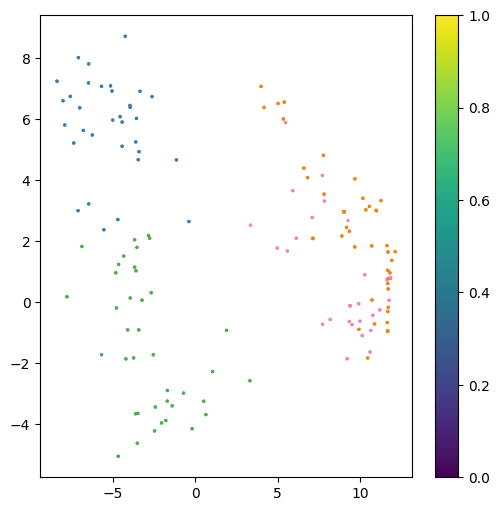

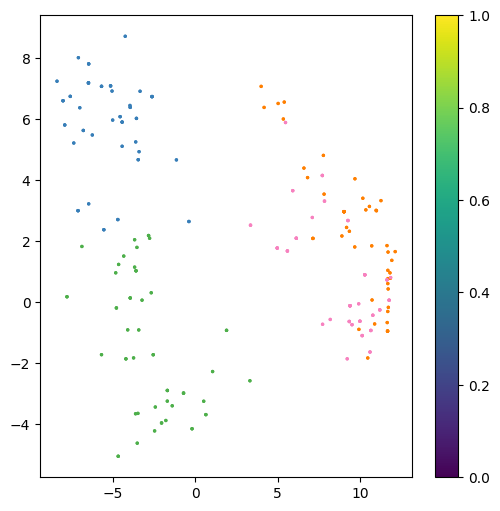

In [40]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 1))))

plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, c=colors[y_pred])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], s=2, c=colors[y_resampled])
plt.colorbar()
plt.show()

In [41]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_resampled, y_resampled)

In [42]:
#X_resampled, y_resampled = ros.fit_resample(X_embedded, y_pred)

In [43]:
from imblearn.over_sampling import SMOTE, ADASYN
start_time = time.time()
X_resampled2, y_resampled2 = SMOTE().fit_resample(X_embedded, y_pred)
#print(sorted(Counter(y_resampled).items()))
end_time = time.time()
end_time-start_time

0.006834745407104492

In [44]:
start_time = time.time()
clf_smote = LinearSVC().fit(X_resampled2, y_resampled2)
end_time = time.time()
end_time-start_time

0.0051212310791015625

In [45]:
start_time = time.time()
X_resampled3, y_resampled3 = ADASYN().fit_resample(X_embedded, y_pred)
#print(sorted(Counter(y_resampled).items()))
end_time = time.time()
end_time-start_time

0.007150411605834961

In [46]:
start_time = time.time()
clf_adasyn = LinearSVC().fit(X_resampled3, y_resampled3)
end_time = time.time()
end_time-start_time

0.0032012462615966797

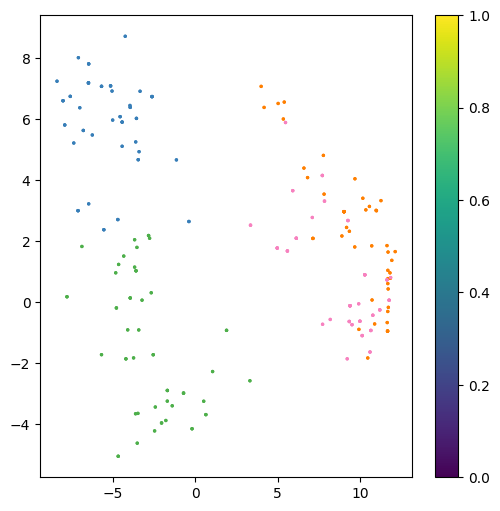

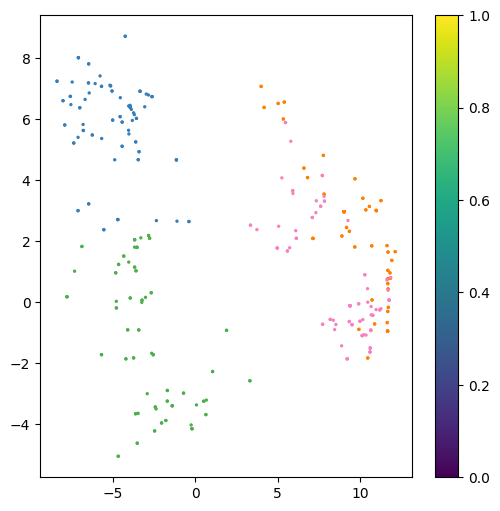

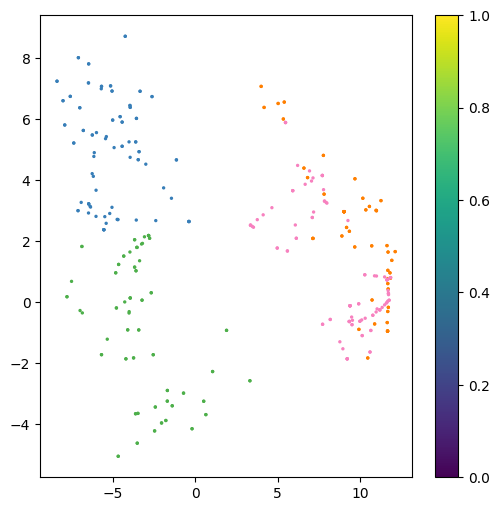

In [47]:
plt.figure(figsize=(6, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], s=2, c=colors[y_resampled])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled2[:, 0], X_resampled2[:, 1], s=2, c=colors[y_resampled2])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled3[:, 0], X_resampled3[:, 1], s=2, c=colors[y_resampled3])
plt.colorbar()
plt.show()

In [48]:
# stops here